!pip install pyxlsb

### Revisión de Datos

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_excel('BasePreliminarINDICES_2005-2022.xlsb', engine='pyxlsb')

In [115]:
df.columns

Index(['Año', 'Cód. Institución', 'Nombre Institución', 'Tipo Institución',
       'Clasificación1', 'Clasificación2', 'Clasificación3', 'Clasificación4',
       'Clasificación5', 'Clasificación6', 'Nombre de la Sede',
       'Comuna donde se imparte la carrera o programa', 'Nombre Region',
       'Orden Geográfico de la Región (Norte aSur)', 'Cód. Carrera',
       'Carrera Genérica', 'Nombre Programa', 'Mención o Especialidad',
       'Horario', 'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera',
       'Tipo Carrera', 'IngresoDirecto', 'Año Inicio Actividades',
       'Nombre del Campus', 'Duración (en semestres)', 'Cód. Campus',
       'Cód. Sede', 'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (

In [17]:
df.dtypes

Año                                                     int64
Cód. Institución                                        int64
Nombre Institución                                     object
Tipo Institución                                       object
Clasificación1                                         object
Clasificación2                                         object
Clasificación3                                         object
Clasificación4                                         object
Clasificación5                                         object
Clasificación6                                         object
Nombre de la Sede                                      object
Comuna donde se imparte la carrera o programa          object
Nombre Region                                          object
Orden Geográfico de la Región (Norte aSur)              int64
Cód. Carrera                                            int64
Carrera Genérica                                       object
Nombre P

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203941 entries, 0 to 203940
Data columns (total 60 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Año                                                 203941 non-null  int64  
 1   Cód. Institución                                    203941 non-null  int64  
 2   Nombre Institución                                  203941 non-null  object 
 3   Tipo Institución                                    203941 non-null  object 
 4   Clasificación1                                      203941 non-null  object 
 5   Clasificación2                                      203941 non-null  object 
 6   Clasificación3                                      203941 non-null  object 
 7   Clasificación4                                      203941 non-null  object 
 8   Clasificación5                                      203935 non-n

In [128]:
df.head(2)

,Año,Cód. Institución,Nombre Institución,Tipo Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,...,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Códgo SIES,Pregrado/Posgrado
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,59.0,77.0,0.0,136,291.0,401.0,5.0,692,I70S1C1J1V2,Pregrado
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,44.0,49.0,8.0,93,178.0,204.0,17.0,382,I70S1C814J1V1,Pregrado


In [20]:
df['Tipo Moneda'].unique()

array(['Pesos', 'Pesos     ', 'pesos     ', 'PESOS     ', 'UF        ',
       'UF'], dtype=object)

In [21]:
nulos = df.isnull().sum().sort_values()

In [22]:
df.shape

(203941, 60)

In [23]:
porcentaje_nulos = nulos[nulos > 0]/df.shape[0]*100
porcentaje_nulos

Comuna donde se imparte la carrera o programa          0.000981
Clasificación5                                         0.002942
Año Inicio Actividades                                 0.034324
Duración (en semestres)                                0.924287
Matrícula total hombres                                1.514163
Matrícula total mujeres                                1.709808
Matrícula primer año hombres                           9.625823
Matrícula primer año mujeres                           9.747917
Título                                                13.464679
Valor del Título                                      17.613427
Valor de matrícula                                    23.134142
Matrícula total extranjeros                           24.578187
Valor de arancel                                      25.053815
Vacantes                                              26.920041
Matrícula primer año extranjeros                      28.623474
Códgo SIES                              

In [24]:
df.groupby(by =['Año','Nombre Institución'])['Promedio Puntaje (promedio matemáticas y lenguaje)'].mean()

Año   Nombre Institución                               
2005  ACADEMIA DE GUERRA DEL EJÉRCITO                             NaN
      ACADEMIA DE GUERRA NAVAL                                    NaN
      ACADEMIA NAC. EST. POLÍTICOS Y ESTRATÉGICOS ANEPE           NaN
      ACADEMIA POLITÉCNICA AERONÁUTICA                            NaN
      ACADEMIA POLITÉCNICA MILITAR                                NaN
                                                              ...    
2022  U. MIGUEL DE CERVANTES                               456.500000
      U. SAN SEBASTIÁN                                     539.650000
      U. SANTO TOMÁS                                       507.704762
      U. SEK                                                      NaN
      U. TECNOLÓGICA DE CHILE INACAP                              NaN
Name: Promedio Puntaje (promedio matemáticas y lenguaje), Length: 2832, dtype: float64

In [25]:
#promedio historico psu vs nueva prueba
#variacion puntajes historicos
#puntajes mas altos y mas bajos

In [26]:
df.groupby('Año')['Promedio Puntaje (promedio matemáticas y lenguaje)'].median()

Año
2005    537.0
2006    523.0
2007    541.0
2008    534.0
2009    530.0
2010    537.0
2011    553.0
2012    544.0
2013    548.0
2014    554.0
2015    550.0
2016    555.0
2017    554.0
2018    551.0
2019    548.0
2020    548.0
2021    540.0
2022    543.0
Name: Promedio Puntaje (promedio matemáticas y lenguaje), dtype: float64

In [27]:
df[df['Códgo SIES'].isnull()]['Carrera Genérica']

101                     Licenciatura en Matemáticas
165                  Física, Astronomía y similares
193       Pedagogía en Educación Física y similares
348                  Física, Astronomía y similares
416                   Ingeniería Civil en Geomática
                            ...                    
203936                                     Posgrado
203937                                     Posgrado
203938                            Diplomado | Curso
203939                                     Posgrado
203940                                     Posgrado
Name: Carrera Genérica, Length: 67997, dtype: object

### Limpieza de datos

In [134]:
df.head(2)

,Año,Cód. Institución,Nombre Institución,Tipo Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,...,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Códgo SIES,Pregrado/Posgrado
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,59.0,77.0,0.0,136,291.0,401.0,5.0,692,I70S1C1J1V2,Pregrado
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,44.0,49.0,8.0,93,178.0,204.0,17.0,382,I70S1C814J1V1,Pregrado


In [132]:
df['Clasificación6'].value_counts()

(a) Subsistema Universitario          79308
(c) No adscrito                       64187
(b) Subsistema Técnico Profesional    59474
(d) F.F.A.A.                            972
Name: Clasificación6, dtype: int64

In [174]:
df_SU=df[df['Clasificación6']=='(a) Subsistema Universitario']

In [175]:
df_SU.head(2)

,Año,Cód. Institución,Nombre Institución,Tipo Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,...,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Códgo SIES,Pregrado/Posgrado
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,59.0,77.0,0.0,136,291.0,401.0,5.0,692,I70S1C1J1V2,Pregrado
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,44.0,49.0,8.0,93,178.0,204.0,17.0,382,I70S1C814J1V1,Pregrado


In [176]:
nulos=df_SU.isnull().sum()

In [177]:
porcentaje_nulos = nulos[nulos > 0]/df_SU.shape[0]*100
porcentaje_nulos.sort_values(ascending=False)

Mención o Especialidad                                85.531094
Mínimo Puntaje Ranking                                78.941595
Máximo Puntaje Ranking                                78.925203
Promedio Puntaje Ranking                              78.741111
Mínimo Puntaje NEM                                    78.718414
Máximo Puntaje NEM                                    78.702022
Promedio Puntaje NEM                                  78.466233
Nº Alumnos Ingreso Otra Via                           75.133656
Puntaje de corte (promedio de la carrera)             64.187724
Puntaje de corte (primer seleccionado)                64.100721
Puntaje de corte (último seleccionado)                62.089575
Mínimo Puntaje (promedio matemáticas y lenguaje)      61.234680
Promedio Puntaje (promedio matemáticas y lenguaje)    60.718969
Máximo Puntaje (promedio matemáticas y lenguaje)      60.705099
Nº Alumnos Ingreso Via PSU o PDT                      60.391133
Códgo SIES                              

In [178]:
columnas_a_eliminar=porcentaje_nulos[porcentaje_nulos >= 62]
columnas_a_eliminar.index

Index(['Mención o Especialidad', 'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (último seleccionado)', 'Máximo Puntaje NEM',
       'Promedio Puntaje NEM', 'Mínimo Puntaje NEM', 'Máximo Puntaje Ranking',
       'Promedio Puntaje Ranking', 'Mínimo Puntaje Ranking',
       'Nº Alumnos Ingreso Otra Via'],
      dtype='object')

In [179]:
df_SU.drop(columns=columnas_a_eliminar.index, inplace=True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [180]:
df_SU.columns

Index(['Año', 'Cód. Institución', 'Nombre Institución', 'Tipo Institución',
       'Clasificación1', 'Clasificación2', 'Clasificación3', 'Clasificación4',
       'Clasificación5', 'Clasificación6', 'Nombre de la Sede',
       'Comuna donde se imparte la carrera o programa', 'Nombre Region',
       'Orden Geográfico de la Región (Norte aSur)', 'Cód. Carrera',
       'Carrera Genérica', 'Nombre Programa', 'Horario', 'Tipo Programa',
       'Area Conocimiento', 'idgenerocarrera', 'Tipo Carrera',
       'IngresoDirecto', 'Año Inicio Actividades', 'Nombre del Campus',
       'Duración (en semestres)', 'Cód. Campus', 'Cód. Sede', 'Título',
       'Grado Académico', 'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Nº Alumnos Ingreso Via PSU o PDT', 'Valor de matrícula',
       'Valor de arancel', 'Valor del Título', 'Tipo Moneda', 'Vacantes',
       'Matrícula pri

In [181]:
drop=['Cód. Institución','Tipo Institución', 'Cód. Campus', 'Cód. Sede', 'Matrícula total hombres', 'Matrícula total mujeres',
       'Matrícula total extranjeros', 'Matrícula Total', 'Códgo SIES']

In [185]:
df_SU.drop(columns=drop, inplace=True)

### Pregrado

In [186]:
df_SU['Pregrado/Posgrado'].value_counts()

Pregrado    47884
Posgrado    31424
Name: Pregrado/Posgrado, dtype: int64

In [191]:
df_SU[df_SU['Pregrado/Posgrado']=='Posgrado'][['Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)']].isnull().sum()

Máximo Puntaje (promedio matemáticas y lenguaje)      31424
Promedio Puntaje (promedio matemáticas y lenguaje)    31424
Mínimo Puntaje (promedio matemáticas y lenguaje)      31424
dtype: int64

In [213]:
df_pregrado=df_SU[df_SU['Pregrado/Posgrado']=='Pregrado']
df_pregrado.isnull().sum()[df_pregrado.isnull().sum()>0]

Comuna donde se imparte la carrera o programa             2
Año Inicio Actividades                                    2
Nombre del Campus                                     18271
Duración (en semestres)                                 444
Título                                                 3002
Grado Académico                                        9513
Máximo Puntaje (promedio matemáticas y lenguaje)      16720
Promedio Puntaje (promedio matemáticas y lenguaje)    16731
Mínimo Puntaje (promedio matemáticas y lenguaje)      17140
Nº Alumnos Ingreso Via PSU o PDT                      16471
Valor de matrícula                                     7620
Valor de arancel                                       8336
Valor del Título                                       7185
Vacantes                                               9183
Matrícula primer año hombres                           4122
Matrícula primer año mujeres                           4027
Matrícula primer año extranjeros        

In [230]:
df_pregrado.loc[(df_pregrado['Matrícula Primer Año'] == 0),'Matrícula primer año hombres']=0

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [232]:
df_pregrado.loc[(df_pregrado['Matrícula Primer Año'] == 0),['Matrícula primer año mujeres',
       'Matrícula primer año extranjeros']]=0

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [233]:
df_pregrado[df_pregrado['Matrícula Primer Año'] == 0][['Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer año extranjeros']]

,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros
10,0.0,0.0,0.0
11,0.0,0.0,0.0
15,0.0,0.0,0.0
21,0.0,0.0,0.0
26,0.0,0.0,0.0
...,...,...,...
167986,0.0,0.0,0.0
167987,0.0,0.0,0.0
168004,0.0,0.0,0.0
168007,0.0,0.0,0.0


In [234]:
df_pregrado.isnull().sum()[df_pregrado.isnull().sum()>0]

Comuna donde se imparte la carrera o programa             2
Año Inicio Actividades                                    2
Nombre del Campus                                     18271
Duración (en semestres)                                 444
Título                                                 3002
Grado Académico                                        9513
Máximo Puntaje (promedio matemáticas y lenguaje)      16720
Promedio Puntaje (promedio matemáticas y lenguaje)    16731
Mínimo Puntaje (promedio matemáticas y lenguaje)      17140
Nº Alumnos Ingreso Via PSU o PDT                      16471
Valor de matrícula                                     7620
Valor de arancel                                       8336
Valor del Título                                       7185
Vacantes                                               9183
Matrícula primer año hombres                            316
Matrícula primer año mujeres                            222
Matrícula primer año extranjeros        

In [235]:
df_pregrado[df_pregrado['Matrícula primer año hombres'].isnull()][['Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer año extranjeros', 'Matrícula Primer Año']]

,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año
859,NaN,10.0,NaN,10
862,NaN,7.0,NaN,7
871,NaN,13.0,NaN,13
1039,NaN,1.0,NaN,1
1085,NaN,14.0,NaN,14
...,...,...,...,...
159608,NaN,30.0,NaN,30
159610,NaN,18.0,NaN,18
159816,NaN,1.0,NaN,1
160125,NaN,1.0,NaN,1


In [236]:
df_pregrado.loc[(df_pregrado['Matrícula Primer Año'] == df_pregrado['Matrícula primer año mujeres']),['Matrícula primer año hombres',
       'Matrícula primer año extranjeros']]=0

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [238]:
df_pregrado.loc[(df_pregrado['Matrícula Primer Año'] == df_pregrado['Matrícula primer año hombres']),['Matrícula primer año mujeres',
       'Matrícula primer año extranjeros']]=0

In [244]:
df_pregrado.loc[(df_pregrado['Matrícula Primer Año'] == (df_pregrado['Matrícula primer año hombres']+df_pregrado['Matrícula primer año mujeres'])),
       'Matrícula primer año extranjeros']=0

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [245]:
df_pregrado[['Matrícula Primer Año','Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer año extranjeros']].isnull().sum()

Matrícula Primer Año                0
Matrícula primer año hombres        0
Matrícula primer año mujeres        0
Matrícula primer año extranjeros    0
dtype: int64

In [246]:
df_pregrado.isnull().sum()[df_pregrado.isnull().sum()>0]

Comuna donde se imparte la carrera o programa             2
Año Inicio Actividades                                    2
Nombre del Campus                                     18271
Duración (en semestres)                                 444
Título                                                 3002
Grado Académico                                        9513
Máximo Puntaje (promedio matemáticas y lenguaje)      16720
Promedio Puntaje (promedio matemáticas y lenguaje)    16731
Mínimo Puntaje (promedio matemáticas y lenguaje)      17140
Nº Alumnos Ingreso Via PSU o PDT                      16471
Valor de matrícula                                     7620
Valor de arancel                                       8336
Valor del Título                                       7185
Vacantes                                               9183
dtype: int64

In [258]:
df_pregrado.columns

Index(['Año', 'Nombre Institución', 'Clasificación1', 'Clasificación2',
       'Clasificación3', 'Clasificación4', 'Clasificación5', 'Clasificación6',
       'Nombre de la Sede', 'Comuna donde se imparte la carrera o programa',
       'Nombre Region', 'Orden Geográfico de la Región (Norte aSur)',
       'Cód. Carrera', 'Carrera Genérica', 'Nombre Programa', 'Horario',
       'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera', 'Tipo Carrera',
       'IngresoDirecto', 'Año Inicio Actividades', 'Nombre del Campus',
       'Duración (en semestres)', 'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Nº Alumnos Ingreso Via PSU o PDT', 'Valor de matrícula',
       'Valor de arancel', 'Valor del Título', 'Tipo Moneda', 'Vacantes',
       'Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer 

In [301]:
df_pregrado['Tipo Carrera'].value_counts()

Profesional con Licenciatura    35892
Técnico Nivel Superior           4622
Profesional                      4257
Licenciatura                     1829
Bachillerato                      812
Plan Común o Ciclo Básico         472
Name: Tipo Carrera, dtype: int64

In [294]:
df_pregrado['Area Conocimiento'].value_counts()

Tecnología                                        12887
Educación                                          8938
Salud                                              6311
Administración y Comercio                          6255
Ciencias Sociales                                  4188
Arte y Arquitectura                                2518
Ciencias                                           2136
Agricultura, Silvicultura, Pesca y Veterinaria     1660
Derecho                                            1609
Humanidades                                        1382
Name: Area Conocimiento, dtype: int64

In [299]:
df_pregrado.groupby('Area Conocimiento')['Matrícula primer año mujeres'].sum()

Area Conocimiento
Administración y Comercio                         142045.0
Agricultura, Silvicultura, Pesca y Veterinaria     37634.0
Arte y Arquitectura                                59664.0
Ciencias                                           41110.0
Ciencias Sociales                                 135671.0
Derecho                                            69206.0
Educación                                         189129.0
Humanidades                                        22779.0
Salud                                             296576.0
Tecnología                                        121310.0
Name: Matrícula primer año mujeres, dtype: float64

In [283]:
df_pregrado.shape

(47884, 40)

In [289]:
df_pregrado[df_pregrado['Valor de arancel'].isnull()]['Area Conocimiento'].value_counts()

Tecnología                                        3240
Educación                                         1736
Administración y Comercio                         1154
Ciencias Sociales                                  437
Arte y Arquitectura                                420
Ciencias                                           382
Agricultura, Silvicultura, Pesca y Veterinaria     329
Salud                                              293
Derecho                                            179
Humanidades                                        166
Name: Area Conocimiento, dtype: int64

In [291]:
df_pregrado.to_excel("pregrado.xls")

C:\Users\fezun\AppData\Local\Temp/ipykernel_41588/856253911.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_pregrado.to_excel("Santo Tomás/pregrado.xls")


In [292]:
df_pregrado.head()

,Año,Nombre Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,Nombre de la Sede,Comuna donde se imparte la carrera o programa,...,Valor de matrícula,Valor de arancel,Valor del Título,Tipo Moneda,Vacantes,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Pregrado/Posgrado
0,2022,U. DE CHILE,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,Santiago,...,157900.0,4329400.0,75000.0,Pesos,125.0,59.0,77.0,0.0,136,Pregrado
1,2022,U. DE CHILE,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,Santiago,...,157900.0,5465600.0,75000.0,Pesos,67.0,44.0,49.0,0.0,93,Pregrado
2,2022,U. DE CHILE,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,Santiago,...,157900.0,6094500.0,75000.0,Pesos,370.0,281.0,228.0,0.0,509,Pregrado
3,2022,U. DE CHILE,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,Santiago,...,157900.0,5465600.0,75000.0,Pesos,137.0,92.0,81.0,0.0,173,Pregrado
4,2022,U. DE CHILE,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,La Pintana,...,157900.0,5059300.0,75000.0,Pesos,150.0,44.0,34.0,0.0,78,Pregrado


In [309]:
df_pregrado.groupby(['Clasificación1','Nombre Region'])['Nombre Institución'].nunique()

Clasificación1              Nombre Region                
(a) Universidades CRUCH     Región Metropolitana             14
                            Región de Antofagasta             4
                            Región de Arica y Parinacota      2
                            Región de Atacama                 1
                            Región de Aysén                   4
                            Región de Coquimbo                2
                            Región de La Araucanía            5
                            Región de Los Lagos               3
                            Región de Magallanes              1
                            Región de Tarapacá                2
                            Región de Valparaíso              5
                            Región de los Ríos                2
                            Región de Ñuble                   4
                            Región del Bío-Bío                6
                            Región del Gral. B

### Ejemplo Educación física

In [266]:
ed_fisica=df_pregrado[df_pregrado['Carrera Genérica']=='Pedagogía en Educación Física y similares']

In [267]:
ed_fisica.isnull().sum().sort_values(ascending=False)

Nombre del Campus                                     402
Mínimo Puntaje (promedio matemáticas y lenguaje)      245
Máximo Puntaje (promedio matemáticas y lenguaje)      233
Promedio Puntaje (promedio matemáticas y lenguaje)    233
Nº Alumnos Ingreso Via PSU o PDT                      223
Valor del Título                                      182
Vacantes                                              166
Valor de arancel                                      146
Valor de matrícula                                    132
Grado Académico                                         3
Título                                                  2
Duración (en semestres)                                 0
Año                                                     0
Nombre Institución                                      0
Tipo Moneda                                             0
Matrícula primer año hombres                            0
Matrícula primer año mujeres                            0
Matrícula prim

In [268]:
nulos = ed_fisica.isnull().sum().sort_values()

In [269]:
porcentaje_nulos = nulos[nulos > 0]/ed_fisica.shape[0]*100
porcentaje_nulos

Título                                                 0.218818
Grado Académico                                        0.328228
Valor de matrícula                                    14.442013
Valor de arancel                                      15.973742
Vacantes                                              18.161926
Valor del Título                                      19.912473
Nº Alumnos Ingreso Via PSU o PDT                      24.398249
Máximo Puntaje (promedio matemáticas y lenguaje)      25.492341
Promedio Puntaje (promedio matemáticas y lenguaje)    25.492341
Mínimo Puntaje (promedio matemáticas y lenguaje)      26.805252
Nombre del Campus                                     43.982495
dtype: float64

In [270]:
columnas_nulas=porcentaje_nulos[porcentaje_nulos>41]
columnas_nulas.index

Index(['Nombre del Campus'], dtype='object')

In [271]:
ed_fisica.drop(columns=columnas_nulas.index, inplace=True)

C:\Users\fezun\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [272]:
ed_fisica.columns

Index(['Año', 'Nombre Institución', 'Clasificación1', 'Clasificación2',
       'Clasificación3', 'Clasificación4', 'Clasificación5', 'Clasificación6',
       'Nombre de la Sede', 'Comuna donde se imparte la carrera o programa',
       'Nombre Region', 'Orden Geográfico de la Región (Norte aSur)',
       'Cód. Carrera', 'Carrera Genérica', 'Nombre Programa', 'Horario',
       'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera', 'Tipo Carrera',
       'IngresoDirecto', 'Año Inicio Actividades', 'Duración (en semestres)',
       'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Nº Alumnos Ingreso Via PSU o PDT', 'Valor de matrícula',
       'Valor de arancel', 'Valor del Título', 'Tipo Moneda', 'Vacantes',
       'Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer año extranjeros', 'Ma

In [273]:
matricula_mujeres=ed_fisica.dropna(subset=['Matrícula primer año mujeres'])

In [274]:
df_mujeres=matricula_mujeres.groupby('Año',as_index=False)['Matrícula primer año mujeres'].sum()
df_mujeres.head(2)

,Año,Matrícula primer año mujeres
0,2005,884.0
1,2006,1011.0


Text(0, 0.5, 'Mujeres matriculadas')

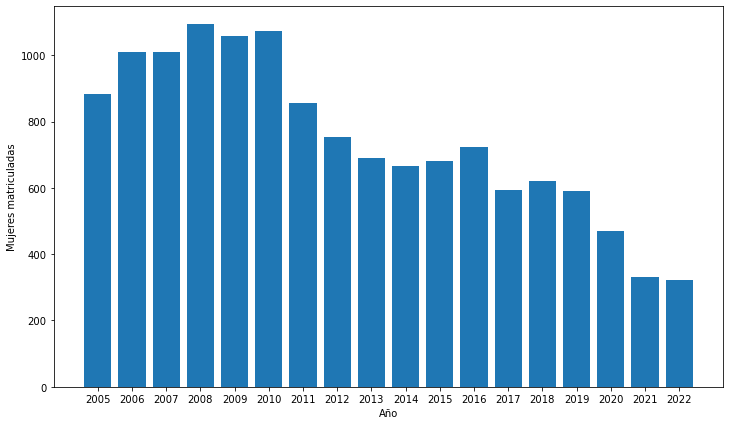

In [275]:
plt.figure(figsize = (12, 7))
plt.bar(df_mujeres['Año'], df_mujeres['Matrícula primer año mujeres'])
plt.xticks(range(2005, 2023))
plt.xlabel('Año')
plt.ylabel('Mujeres matriculadas')

<AxesSubplot:xlabel='Año', ylabel='Matrícula primer año mujeres'>

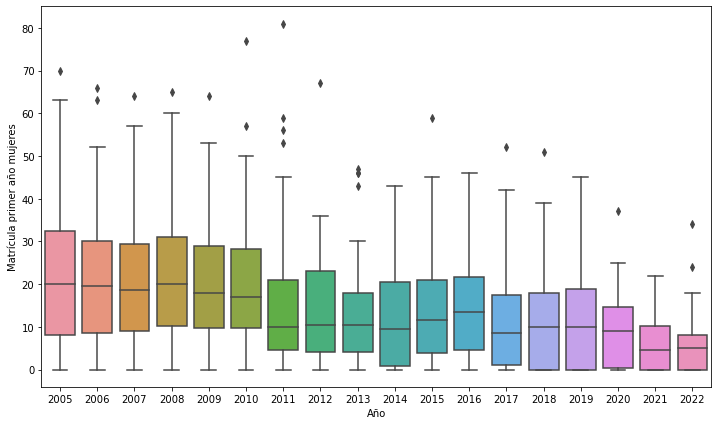

In [276]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='Año', y='Matrícula primer año mujeres', data=matricula_mujeres)

In [277]:
ed_fisica.columns

Index(['Año', 'Nombre Institución', 'Clasificación1', 'Clasificación2',
       'Clasificación3', 'Clasificación4', 'Clasificación5', 'Clasificación6',
       'Nombre de la Sede', 'Comuna donde se imparte la carrera o programa',
       'Nombre Region', 'Orden Geográfico de la Región (Norte aSur)',
       'Cód. Carrera', 'Carrera Genérica', 'Nombre Programa', 'Horario',
       'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera', 'Tipo Carrera',
       'IngresoDirecto', 'Año Inicio Actividades', 'Duración (en semestres)',
       'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Nº Alumnos Ingreso Via PSU o PDT', 'Valor de matrícula',
       'Valor de arancel', 'Valor del Título', 'Tipo Moneda', 'Vacantes',
       'Matrícula primer año hombres', 'Matrícula primer año mujeres',
       'Matrícula primer año extranjeros', 'Ma

In [278]:
ed_fisica['Nombre Region'].value_counts()

Región Metropolitana            265
Región del Bío-Bío              106
Región de Valparaíso             98
Región de La Araucanía           92
Región de Los Lagos              75
Región del Maule                 48
Región de Antofagasta            43
Región de Coquimbo               37
Región de los Ríos               35
Región de Arica y Parinacota     29
Región de Atacama                25
Región de Tarapacá               23
Región de Magallanes             21
Región de Ñuble                  17
Name: Nombre Region, dtype: int64

In [279]:
matricula_hombres=ed_fisica.dropna(subset=['Matrícula primer año hombres'])
matricula_hombres.head(2)

,Año,Nombre Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,Nombre de la Sede,Comuna donde se imparte la carrera o programa,...,Valor de matrícula,Valor de arancel,Valor del Título,Tipo Moneda,Vacantes,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Pregrado/Posgrado
120,2022,PONTIFICIA U. CATÓLICA DE CHILE,(a) Universidades CRUCH,(b) Universidades Privadas CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Santiago,Macul,...,147000.0,4758000.0,0.0,Pesos,60.0,47.0,34.0,0.0,81,Pregrado
192,2022,U. DE CONCEPCIÓN,(a) Universidades CRUCH,(b) Universidades Privadas CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,Concepción,Concepción,...,130000.0,3295797.0,39500.0,Pesos,70.0,44.0,12.0,0.0,56,Pregrado


In [280]:
df_hombres=matricula_hombres.groupby('Año',as_index=False)['Matrícula primer año hombres'].sum()
df_hombres.head(2)

,Año,Matrícula primer año hombres
0,2005,1702.0
1,2006,1940.0


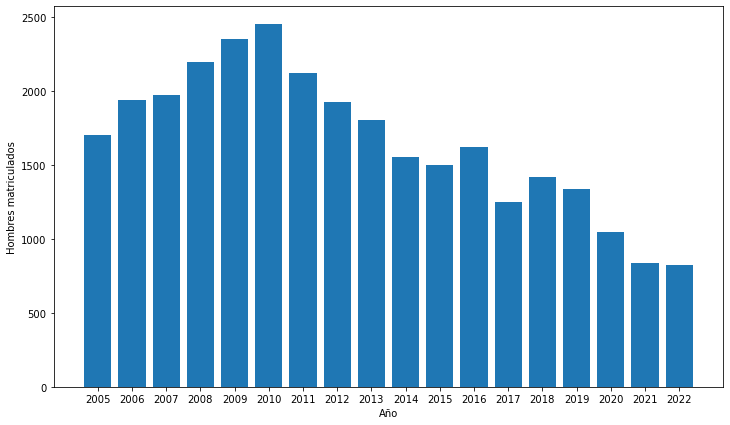

In [281]:
plt.figure(figsize = (12, 7))
plt.bar(df_hombres['Año'], df_hombres['Matrícula primer año hombres'])
plt.xlabel('Año')
plt.ylabel('Hombres matriculados')
plt.xticks(range(2005, 2023))
plt.show()